# OPIM 3511 HW3 - Spring 2022
# DUE: 2/28/2022 11:59PM

Download your HW as a .ipynb file, then submit it to HuskyCT.

When sharing the link, please make sure you change your setting to "anyone with link can view".

We are going to practice our regression modeling skills using a real-world dataset. Your goal is to predict an automobile's MPG as a function of the attributes we used in class.

Here is a description of the dataset:
* https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [1]:
#import all your libraries
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sb


In [2]:
from sklearn.model_selection import train_test_split


In [3]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
from sklearn.linear_model import LinearRegression


In [5]:
# did you know you can read some CSV files directly from a website? here it is!
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv')
# now the dataset in loaded into df

## Question A

In [ ]:
# 1. How many rows and columns are there in the dataframe?
df.shape

(398, 7)

In [ ]:
# 2. Any missing values?
df.isnull().sum().sum()

2

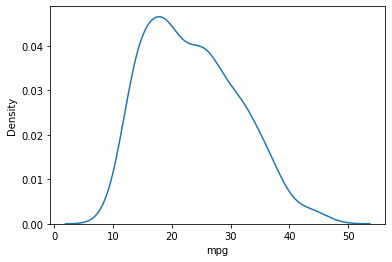

In [ ]:
# 3. Make a kernel density plot of the target variable, mpg.
sb.kdeplot(x=df['mpg'])
show()

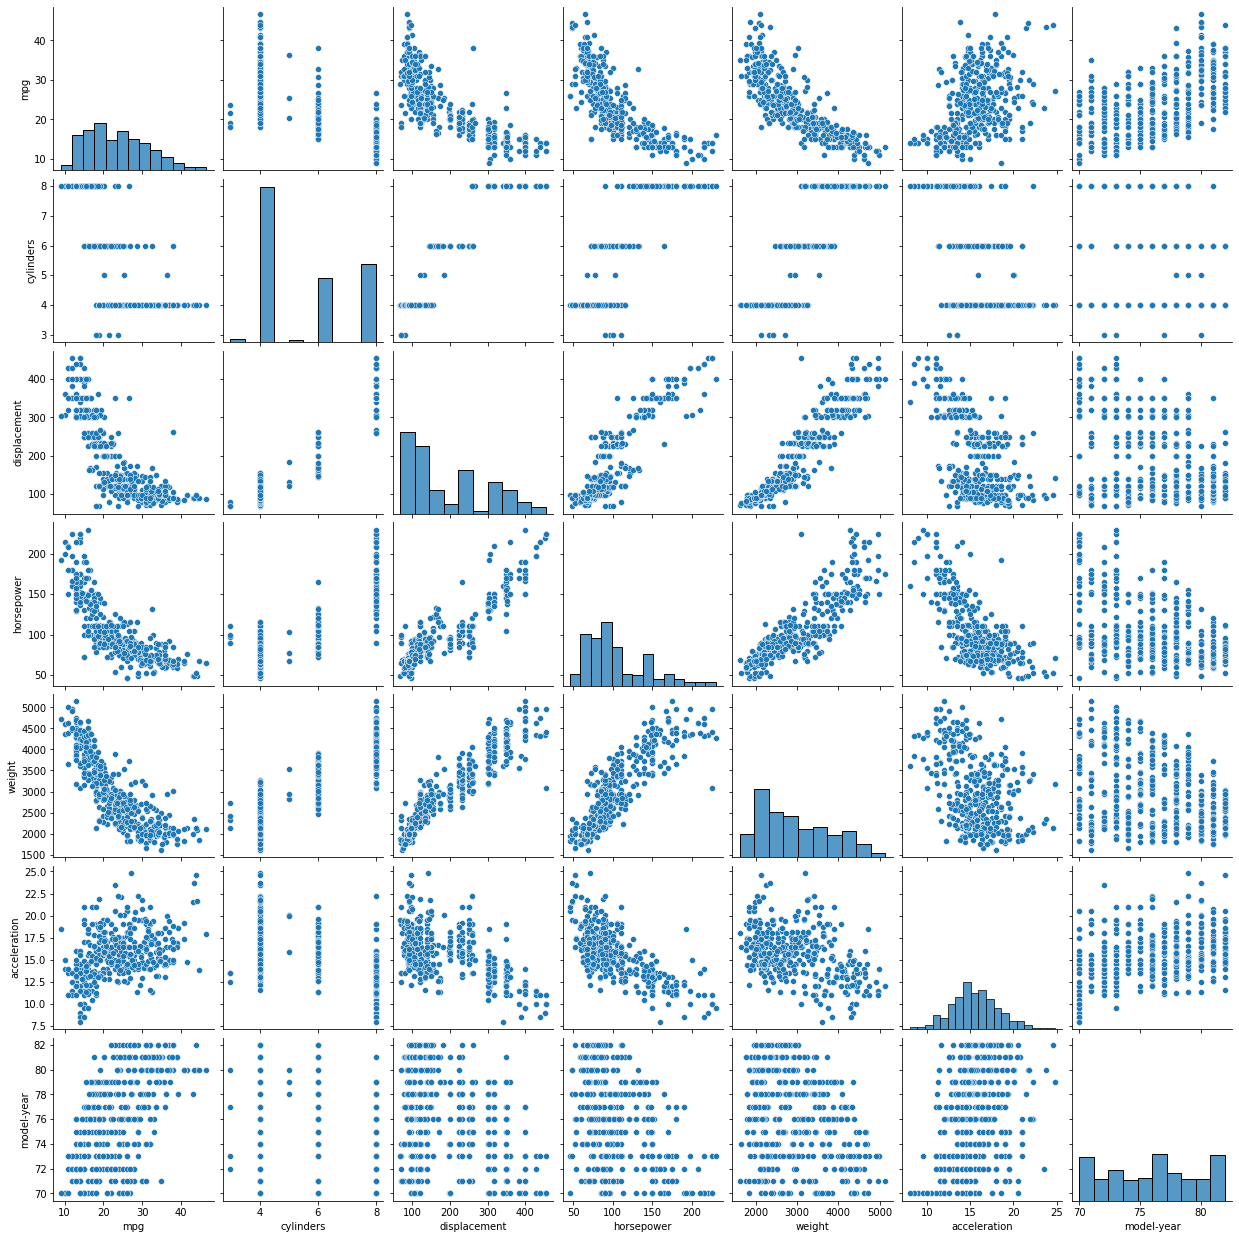

In [ ]:
# 4. Make a pairplot like we did in the last homework, which variables are most strongly correlated with mpg?
sb.pairplot(df)
#weight and horsepower are most strongly correlated with mpg

In [ ]:
# 5. Select ONE variable as X (select anything you want), save it to X.
X = df['weight']
print(X.shape)

(398,)


In [ ]:
Y = df['mpg']
print(Y.shape)      

(398,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    shuffle = True)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(278,) (120,) (278,) (120,)


In [ ]:
# 6. # Now, split the data into X_train, X_test, y_train, y_test. 
# Use 30% test size sample.
# Use a random_state = YOUR_STUDENT_ID (a 7 digit number unique to you).
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, shuffle = True, random_state = 2032019)

In [ ]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)


In [ ]:
# 7. Fit a Simple Linear Regression model on the training data.
LR = LinearRegression()
LR = LR.fit(X_train, y_train)

In [ ]:
# 8. Use your model to predict `mpg` for X_test.
train_preds = LR.predict(X_train)
test_preds = LR.predict(X_test)
np.shape(train_preds)

(278, 1)

In [ ]:
# 9. Calculate R2 and MAE for your model.
print("This is train R2:", r2_score(y_train, train_preds))
print("This is test R2:", r2_score(y_test, test_preds))


This is train R2: 0.6824854231223829
This is test R2: 0.7113184028758126


In [ ]:
trainMAE = mean_absolute_error(y_train, train_preds)
testMAE = mean_absolute_error(y_test, test_preds)
print("This is trainMAE:", trainMAE)
print("This is testMAE:", testMAE)

This is trainMAE: 3.364395624973181
This is testMAE: 3.1243687991128666


Text(0.5, 0.98, 'Train Results')

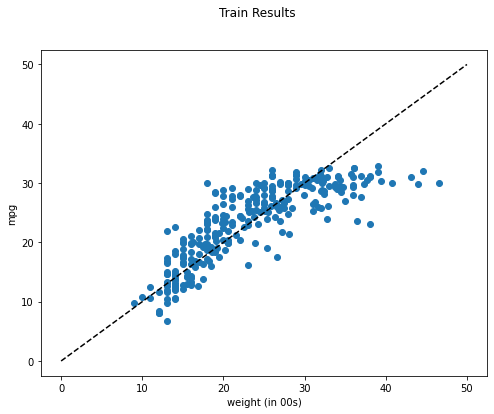

In [ ]:
# 10. Make a scatterplot of actual vs. predicted values for a) the training data and b) the test data.
figure(figsize=(8,6))
scatter(x=y_train, y=train_preds)
plot([0,50], [0,50], '--k')
xlabel('weight (in 00s)')
ylabel('mpg')
suptitle('Train Results')

Text(0.5, 0.98, 'Test Results')

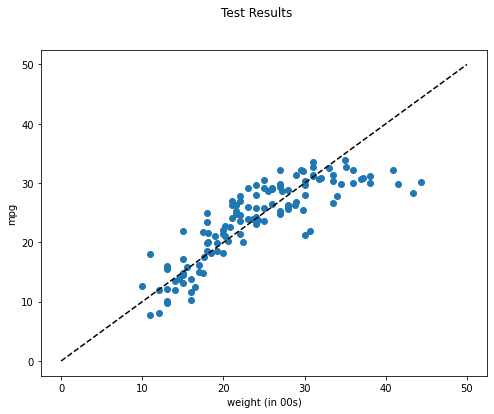

In [ ]:
figure(figsize=(8,6))
scatter(x=y_test, y=test_preds)
plot([0,50], [0,50], '--k')
xlabel('weight (in 00s)')
ylabel('mpg')
suptitle('Test Results')

## Question B

Hint: If you see some warning saying "missing value", this means that we have missing values in our dataset. Directly drop the row (for both x and y) before you assign the df to training and testing. 

In [ ]:
# 1. Now assign all variables other than mpg to X_m

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
df.dropna(axis = 0, inplace = True)

In [8]:
Y = df['mpg']
print(Y.shape)

(396,)


In [9]:
X_m = df.drop('mpg', axis=1)
print(X_m.shape)

(396, 6)


In [ ]:
X_m.head()

,cylinders,displacement,horsepower,weight,acceleration,model-year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [ ]:
# 2. # Now, split the data into X_train, X_test, y_train, y_test. 
# Use 20% test size sample.
# Use a random_state = YOUR_STUDENT_ID (a 7 digit number unique to you).

In [10]:
X_mtrain, X_mtest, y_train, y_test = train_test_split(X_m,Y, test_size = 0.2, shuffle = True, random_state = 2032019)

In [ ]:
# 3. Use MinMaxScaler() on the train data, and apply to the test data. 
# Check your work to make sure X_train has values between 0 and 1 for all numeric columns.

In [11]:
print(X_mtrain.shape, X_mtest.shape, y_train.shape, y_test.shape)

(316, 6) (80, 6) (316,) (80,)


In [12]:
X_train = np.array(X_mtrain)
X_test = np.array(X_mtest)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
tmp = pd.DataFrame(X_train)
tmp.describe()

,0,1,2,3,4,5
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,0.491772,0.324964,0.312213,0.386018,0.428341,0.505274
std,0.343736,0.274227,0.211590,0.242468,0.165669,0.311972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.094961,0.157967,0.174227,0.323620,0.250000
50%,0.200000,0.200258,0.255495,0.339665,0.423313,0.500000
75%,1.000000,0.604651,0.445055,0.567550,0.521472,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 4. Fit a Multiple Linear Regression model on the training data.

In [ ]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       316 non-null    float64
 1   1       316 non-null    float64
 2   2       316 non-null    float64
 3   3       316 non-null    float64
 4   4       316 non-null    float64
 5   5       316 non-null    float64
dtypes: float64(6)
memory usage: 14.9 KB


In [15]:
LR = LinearRegression()


In [16]:
LR = LR.fit(X_train, y_train)

In [17]:
np.where(df.values >= np.finfo(np.float64).max)


(array([], dtype=int64), array([], dtype=int64))

In [ ]:
# 5. Use your model to predict `mpg` for X_test.

In [18]:
train_preds = LR.predict(X_train)
test_preds = LR.predict(X_test)
np.shape(train_preds)

(316,)

In [ ]:
# 6. Calculate R2 and MSE for your model.

In [19]:
print("This is train R2:", r2_score(y_train, train_preds))
print("This is test R2:", r2_score(y_test, test_preds))

This is train R2: 0.8028676078543827
This is test R2: 0.8233381910356578


In [20]:
trainMAE = mean_absolute_error(y_train, train_preds)
testMAE = mean_absolute_error(y_test, test_preds)
print("This is trainMAE:", trainMAE)
print("This is testMAE:", testMAE)

This is trainMAE: 2.6895690339035365
This is testMAE: 2.531156174015258


In [ ]:
# 7. Write 5 meaningful bullets about what you learned from both question A and quetsion B.

In [21]:
#1. If you get an error when doing the linear regression, you may need to check if you have NaN values, then drop those values
#2. Your regression may have the best results when you use variables that have higher correlation
#3. When using minmaxscaler, you can use the .describe command and make sure all values are between 0 and 1 to ensure you did it correctly
#4. Make sure you only use minmaxscaler on the x variables
#5. The changing the test size is how you can split your data into different portions for training and testing. The optimal split seems to be 80/20